# **EJERCICIO 1** 
## Regresión Lineal
*1. Realizar un análisis exploratorio de los datos para identificar 
relaciones entre variables, valores atípicos, tendencias, etc.  
2. Preprocesar los datos limpiándolos, tratando valores faltantes y 
transformándolos según sea necesario.  
3. Seleccionar las características más relevantes para entrenar el 
modelo utilizando selección de características.   
4. Dividir el dataset en Train y Test para evaluar correctamente el 
modelo.  
5. Entrenar el modelo configurando los diferentes hiperparámetros.  
6. Evaluar el desempeño del modelo en el conjunto de Test con
métricas como precisión, recall, F1-score, etc.  
7. Realizar las diferentes gráficas que permitan visualizar los 
resultados del modelo.  
8. Interpretar, analizar y documentar los resultados obtenidos.  
9. Crear una cuenta en GitHub y cargar los códigos de los modelos 
diseñados https://github.com/*  

# **1. Realizar un análisis exploratorio de los datos para identificar**

In [13]:
# Cargar las Librerías necesarias

import pandas as pd # Manejo y análisis de estructuras de datos  
import numpy as np # Cálculo numérico y el análisis de datos  
import seaborn as sns # Creación gráficos estadísticos  
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones  

# Librerías de para implementar modelos de ciencia de datos  
from sklearn import metrics  
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import classification_report, confusion_matrix  

In [14]:
 #Lectura de daots en phyton y lo cargamos en una variable datos

Datos= pd.read_csv('C:/Users/micho/Downloads/DataSets 2/Regresion Lineal/Car details v3.csv')


In [15]:
# Extraer números (incluyendo decimales) antes de "kmpl"
Datos['mileage'] = Datos['mileage'].str.extract(r'(\d+\.?\d*)').astype(float)

# Verificar
print(Datos['mileage'].head())

0    23.40
1    21.14
2    17.70
3    23.00
4    16.10
Name: mileage, dtype: float64


In [16]:
# Extraer números antes de "CC"
Datos['engine'] = Datos['engine'].str.extract(r'(\d+)').astype(float)

# Verificar
print(Datos['engine'].head())

0    1248.0
1    1498.0
2    1497.0
3    1396.0
4    1298.0
Name: engine, dtype: float64


In [17]:
# Extraer números (incluyendo decimales) antes de "bhp"
Datos['max_power'] = Datos['max_power'].str.extract(r'(\d+\.?\d*)').astype(float)

# Verificar
print(Datos['max_power'].head())

0     74.00
1    103.52
2     78.00
3     90.00
4     88.20
Name: max_power, dtype: float64


In [23]:
# Convertir a entero (manejando decimales)
Datos['seats'] = Datos['seats'].astype(float).astype('Int64')  # "Int64" permite valores nulos

# Verificar
print(Datos['seats'].head())

0    5
1    5
2    5
3    5
4    5
Name: seats, dtype: Int64


In [25]:
#Realizamos lectura de los datos para el EDA

Datos.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,113.75nm@ 4000rpm,5
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.30,1061.0,57.50,"7.8@ 4,500(kgm@ rpm)",5
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.10,796.0,37.00,59Nm@ 2500rpm,4
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59,1364.0,67.10,170Nm@ 1800-2400rpm,5
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.00,1399.0,68.10,160Nm@ 2000rpm,5


In [27]:
# Información general (columnas, tipos de datos, valores nulos)
print("\nInformación del dataset:")
print(Datos.info()) # Muestra información sobre el dataset


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   float64
 9   engine         7907 non-null   float64
 10  max_power      7912 non-null   float64
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   Int64  
dtypes: Int64(1), float64(3), int64(3), object(6)
memory usage: 833.6+ KB
None


In [29]:
# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(Datos.describe().round(2))  # Muestra las estadísticas descriptivas del dataset, redondeando los valores a 2 decimales



Estadísticas descriptivas:
          year  selling_price   km_driven  mileage   engine  max_power   seats
count  8128.00        8128.00     8128.00  7907.00  7907.00    7912.00  7907.0
mean   2013.80      638271.81    69819.51    19.42  1458.63      91.52    5.42
std       4.04      806253.40    56550.55     4.04   503.92      35.82    0.96
min    1983.00       29999.00        1.00     0.00   624.00       0.00     2.0
25%    2011.00      254999.00    35000.00    16.78  1197.00      68.05     5.0
50%    2015.00      450000.00    60000.00    19.30  1248.00      82.00     5.0
75%    2017.00      675000.00    98000.00    22.32  1582.00     102.00     5.0
max    2020.00    10000000.00  2360457.00    42.00  3604.00     400.00    14.0


In [31]:
# Mostrar todos los colores disponibles
colors = plt.colormaps() # Obtiene una lista de todos los colormaps disponibles
print(colors)


['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'Blues_r', 'BrBG_r', '

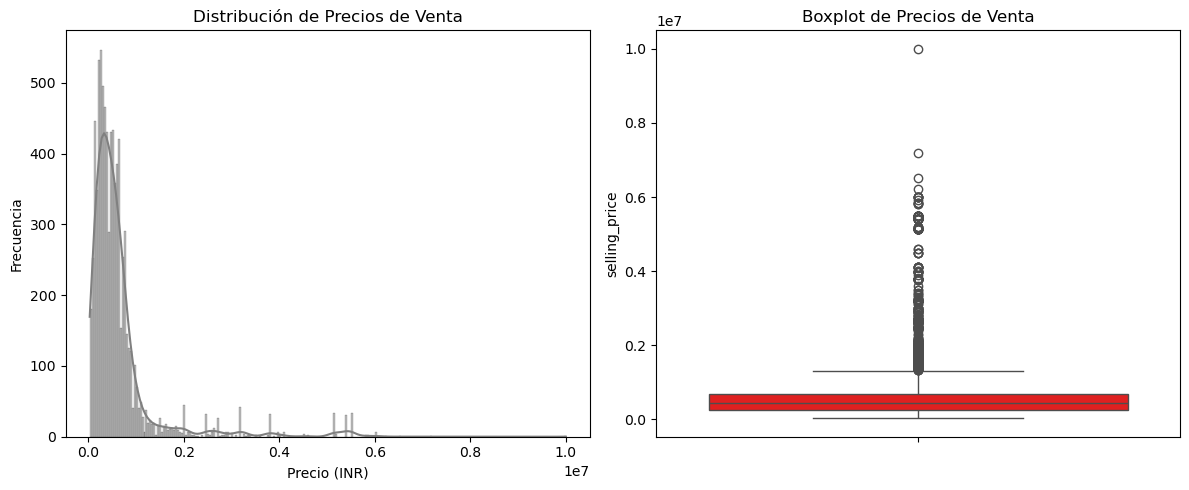

In [33]:
# Configurar el tamaño de la figura
plt.figure(figsize=(12, 5))# tamaño de la figura

# Subplot 1: Histograma
plt.subplot(1, 2, 1)  # Crea el primer subplot en una figura con 1 fila y 2 columnas
sns.histplot(Datos['selling_price'], kde=True, color='grey')  # Crea un histograma de los precios de venta con una línea de densidad (kde) y color gris
plt.title('Distribución de Precios de Venta')  # Establece el título del histograma
plt.xlabel('Precio (INR)')  # Etiqueta del eje X
plt.ylabel('Frecuencia')  # Etiqueta del eje Y

# Subplot 2: Boxplot
plt.subplot(1, 2, 2)  # Crea el segundo subplot en la misma figura
sns.boxplot(y=Datos['selling_price'], color='red')  # Crea un boxplot de los precios de venta con color rojo
plt.title('Boxplot de Precios de Venta')  # Establece el título del boxplot

plt.tight_layout()  # Ajusta el diseño para que los subplots no se solapen
plt.show()  # Muestra la figura con los subplots

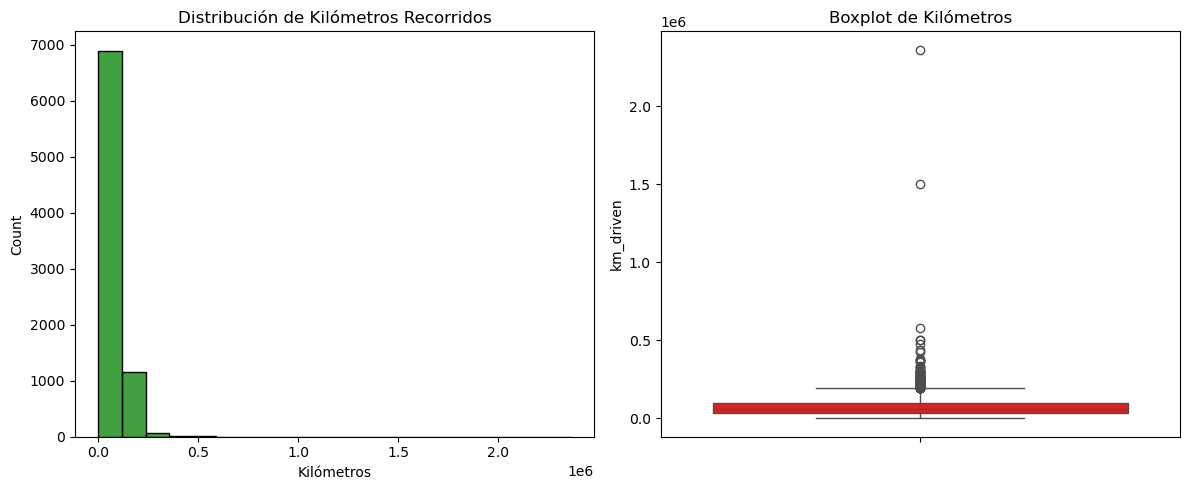

In [35]:
plt.figure(figsize=(12, 5))

# Histograma
plt.subplot(1, 2, 1)
sns.histplot(Datos['km_driven'], color='green', bins=20)
plt.title('Distribución de Kilómetros Recorridos')
plt.xlabel('Kilómetros')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=Datos['km_driven'], color='red')
plt.title('Boxplot de Kilómetros')

plt.tight_layout()
plt.show()

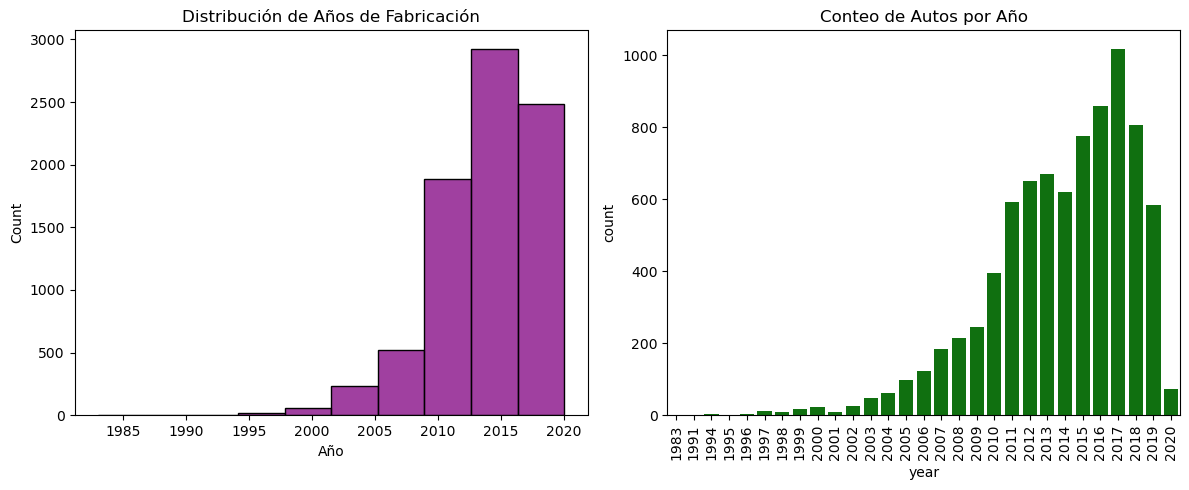

In [37]:
plt.figure(figsize=(12, 5))  # Crea una figura con un tamaño específico (12 de ancho por 5 de alto)

# Histograma
plt.subplot(1, 2, 1)  # Crea el primer subplot en una figura con 1 fila y 2 columnas
sns.histplot(Datos['year'], color='purple', bins=10)  # Crea un histograma de los años de fabricación con color púrpura y 10 bins
plt.title('Distribución de Años de Fabricación')  # Establece el título del histograma
plt.xlabel('Año')  # Etiqueta del eje X

# Gráfico de barras (conteo por año)
plt.subplot(1, 2, 2)  # Crea el segundo subplot en la misma figura
sns.countplot(x='year', data=Datos, color='green')  # Crea un gráfico de barras para el conteo de autos por año.
plt.title('Conteo de Autos por Año')  # Establece el título del gráfico de barras
plt.xticks(rotation=90)  # Rota las etiquetas del eje X 45 grados para mejor legibilidad

plt.tight_layout()  # Ajusta el diseño para evitar solapamientos
plt.show()  # Muestra la figura con los subplots

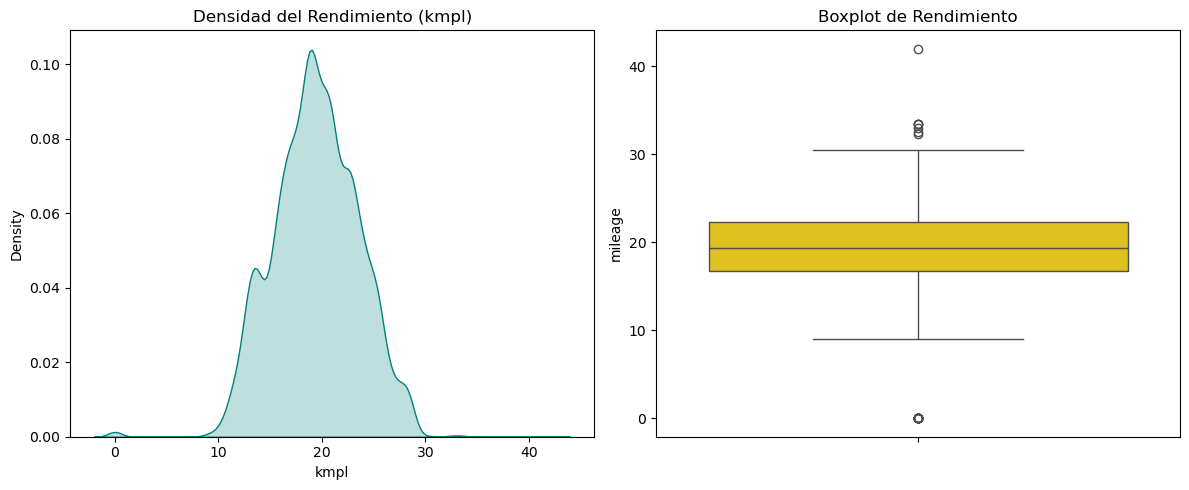

In [39]:
plt.figure(figsize=(12, 5))

# KDE (Estimación de Densidad)
plt.subplot(1, 2, 1)
sns.kdeplot(Datos['mileage'], color='teal', fill=True)
plt.title('Densidad del Rendimiento (kmpl)')
plt.xlabel('kmpl')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=Datos['mileage'], color='gold')
plt.title('Boxplot de Rendimiento')

plt.tight_layout()
plt.show()

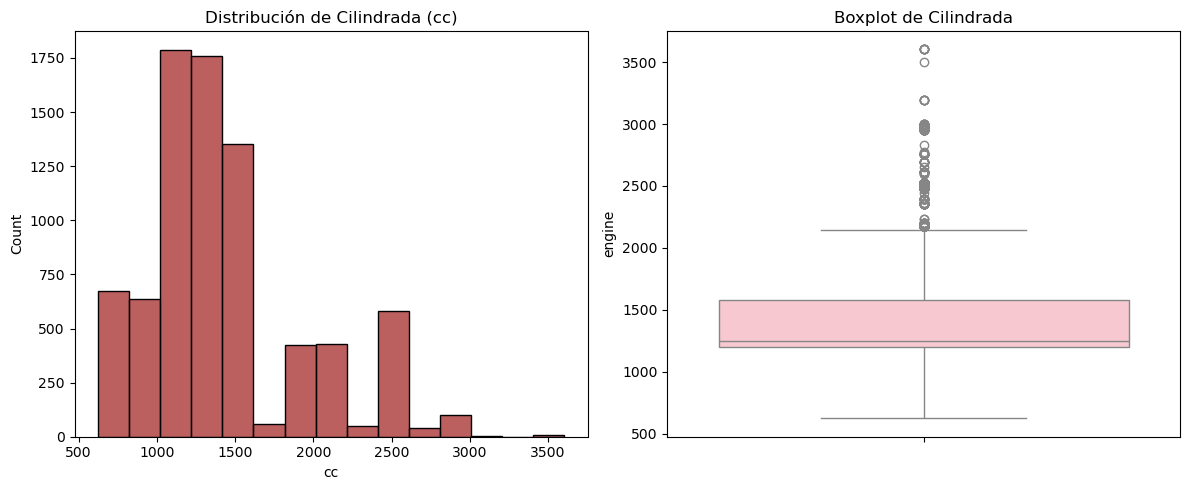

In [41]:
plt.figure(figsize=(12, 5))

# Histograma
plt.subplot(1, 2, 1)
sns.histplot(Datos['engine'], color='brown', bins=15)
plt.title('Distribución de Cilindrada (cc)')
plt.xlabel('cc')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=Datos['engine'], color='pink')
plt.title('Boxplot de Cilindrada')

plt.tight_layout()
plt.show()

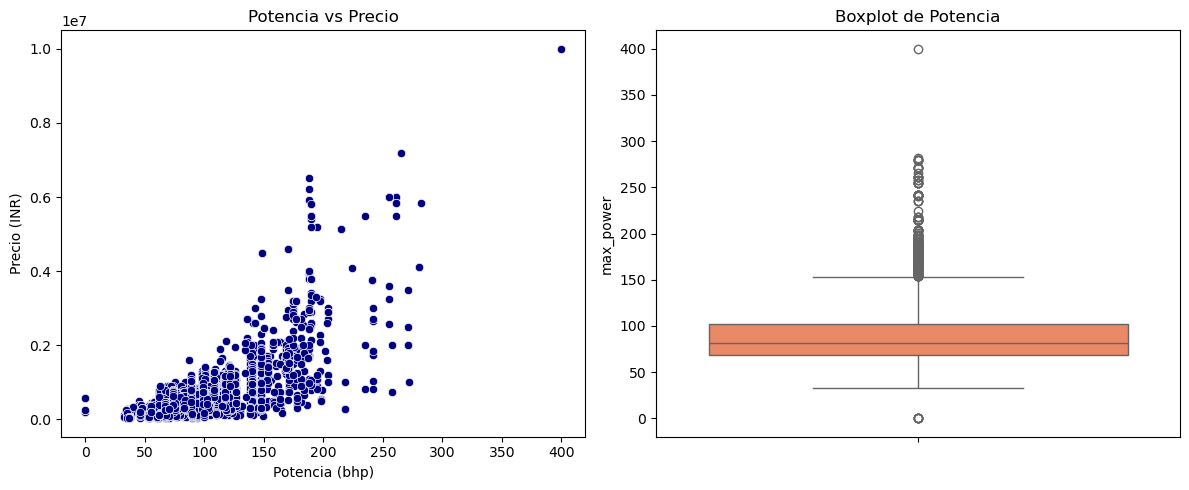

In [43]:
plt.figure(figsize=(12, 5))

# Scatter plot (Potencia vs Precio)
plt.subplot(1, 2, 1)
sns.scatterplot(x='max_power', y='selling_price', data=Datos, color='navy')
plt.title('Potencia vs Precio')
plt.xlabel('Potencia (bhp)')
plt.ylabel('Precio (INR)')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=Datos['max_power'], color='coral')
plt.title('Boxplot de Potencia')

plt.tight_layout()
plt.show()

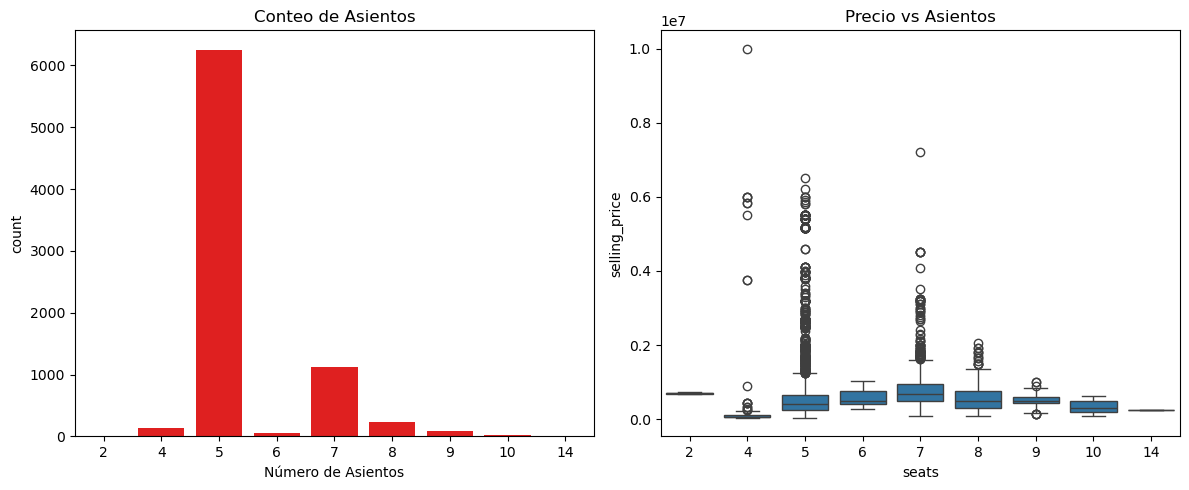

In [45]:
plt.figure(figsize=(12, 5))

# Conteo de asientos
plt.subplot(1, 2, 1)
sns.countplot(x='seats', data=Datos, color='red')
plt.title('Conteo de Asientos')
plt.xlabel('Número de Asientos')

# Boxplot (aunque es una variable categórica ordinal)
plt.subplot(1, 2, 2)
sns.boxplot(x='seats', y='selling_price', data=Datos)
plt.title('Precio vs Asientos')
plt.xticks(rotation=1)

plt.tight_layout()
plt.show()

## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

In [48]:
# Contar valores nulos por columna
valores_faltantes = Datos.isnull().sum()
print("Valores faltantes por columna:")
print(valores_faltantes)

Valores faltantes por columna:
name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        216
torque           222
seats            221
dtype: int64


In [50]:
#Remplazar los datos faltantes
Datos['mileage'] = Datos['mileage'].fillna(Datos['mileage'].mean())
Datos['engine'] = Datos['engine'].fillna(Datos['engine'].mean())
Datos['max_power'] = Datos['max_power'].fillna(Datos['max_power'].mean())
Datos['torque'] = Datos['torque'].fillna(Datos['engine'].mean())

In [52]:
# Calcular la MEDIANA 
mediana_seats = int(Datos['seats'].median())

# Rellenar nulos con la mediana (entero)
Datos['seats'] = Datos['seats'].fillna(mediana_seats)

In [54]:
# Revisar faltantes
valores_faltantes = Datos.isnull().sum()
print("Valores faltantes por columna:")
print(valores_faltantes)

Valores faltantes por columna:
name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64


In [57]:
#Revisión de datos faltantes

print("Cantidad de Registros con cero en year: ",Datos['year'].isin([0]).sum())
print("Cantidad de Registros con cero en selling_price: ",Datos['selling_price'].isin([0]).sum())
print("Cantidad de Registros con cero en km_driven: ",Datos['km_driven'].isin([0]).sum())
print("Cantidad de Registros con cero en mileage: ",Datos['mileage'].isin([0]).sum())
print("Cantidad de Registros con cero en engine: ",Datos['engine'].isin([0]).sum())
print("Cantidad de Registros con cero en max_power: ",Datos['max_power'].isin([0]).sum())

Cantidad de Registros con cero en year:  0
Cantidad de Registros con cero en selling_price:  0
Cantidad de Registros con cero en km_driven:  0
Cantidad de Registros con cero en mileage:  17
Cantidad de Registros con cero en engine:  0
Cantidad de Registros con cero en max_power:  6


In [59]:
Datos['mileage']=Datos['mileage'].replace(0,Datos['mileage'].mean())
Datos['max_power']=Datos['max_power'].replace(0,Datos['max_power'].mean())

In [61]:
#Revisión de datos faltantes

print("Cantidad de Registros con cero en year: ",Datos['year'].isin([0]).sum())
print("Cantidad de Registros con cero en selling_price: ",Datos['selling_price'].isin([0]).sum())
print("Cantidad de Registros con cero en km_driven: ",Datos['km_driven'].isin([0]).sum())
print("Cantidad de Registros con cero en mileage: ",Datos['mileage'].isin([0]).sum())
print("Cantidad de Registros con cero en engine: ",Datos['engine'].isin([0]).sum())
print("Cantidad de Registros con cero en max_power: ",Datos['max_power'].isin([0]).sum())

Cantidad de Registros con cero en year:  0
Cantidad de Registros con cero en selling_price:  0
Cantidad de Registros con cero en km_driven:  0
Cantidad de Registros con cero en mileage:  0
Cantidad de Registros con cero en engine:  0
Cantidad de Registros con cero en max_power:  0


## 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

In [64]:
# Codificar variables categóricas
Datos_encoded = pd.get_dummies(Datos, columns=["fuel", "seller_type", "transmission", "owner"])

# 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.

In [67]:
# Matriz de correlación (solo variables numéricas)
correlacion = Datos_encoded.corr(numeric_only=True)["selling_price"].sort_values(ascending=False)

# Filtrar variables con correlación significativa (> 0.2 o < -0.2)
variables_correlacionadas = correlacion[abs(correlacion) > 0.2].index.tolist()
print("Variables correlacionadas con el precio:", variables_correlacionadas)

Variables correlacionadas con el precio: ['selling_price', 'max_power', 'transmission_Automatic', 'engine', 'year', 'seller_type_Dealer', 'owner_First Owner', 'fuel_Diesel', 'km_driven', 'seller_type_Individual', 'transmission_Manual']


In [71]:
# Variables independientes y dependiente
X = Datos_encoded[["year", "km_driven", "max_power", "engine", "fuel_Diesel"]]
y = Datos_encoded["selling_price"]

# 5. Entrenar el modelo configurando los diferentes hiperparámetros.

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

# 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc. 

In [80]:
# Coeficientes del modelo (interpretación)
coeficientes = pd.DataFrame({
    "Variable": X.columns,
    "Coeficiente": modelo.coef_
})
print(coeficientes)

      Variable   Coeficiente
0         year  41822.789390
1    km_driven     -1.424491
2    max_power  16597.824767
3       engine   -102.538832
4  fuel_Diesel  63477.432553


# 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

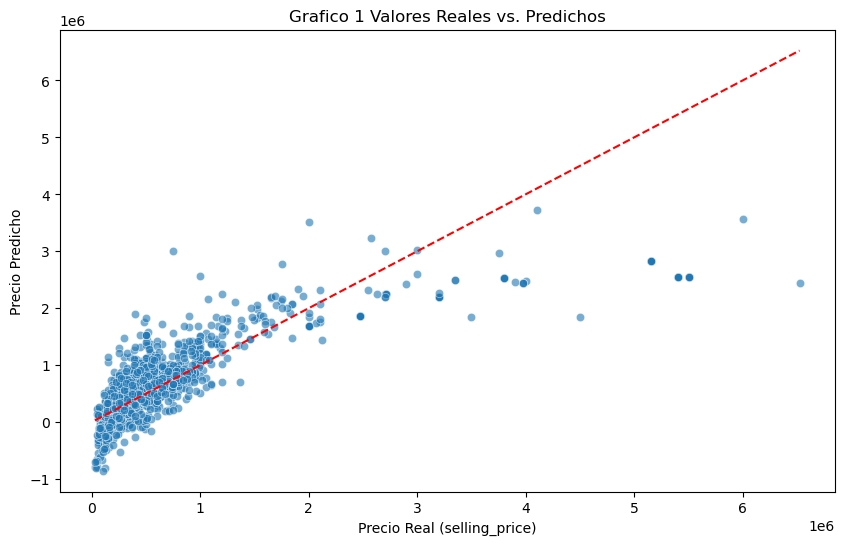

In [102]:
# Predecir con el modelo entrenado
y_pred = modelo.predict(X_test)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Línea de 45°
plt.title('Grafico 1 Valores Reales vs. Predichos')
plt.xlabel('Precio Real (selling_price)')
plt.ylabel('Precio Predicho')
plt.show()

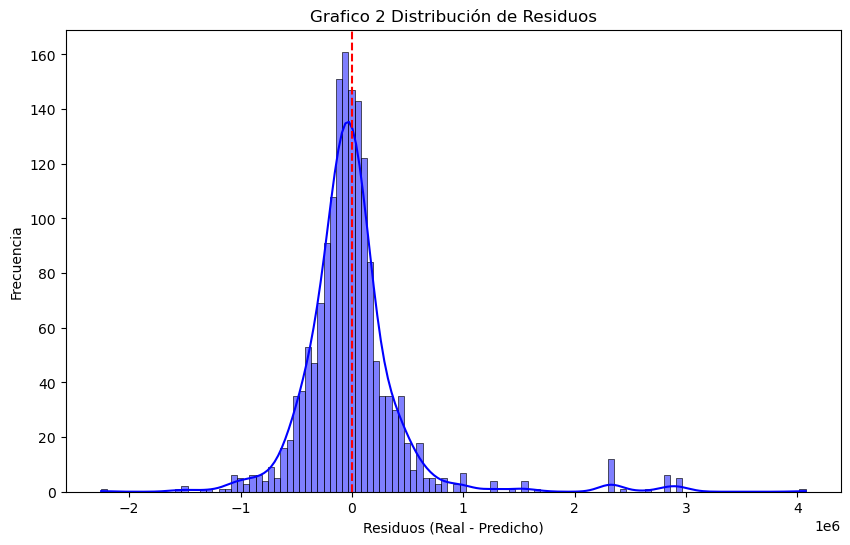

In [104]:
residuos = y_test - y_pred

# Histograma de residuos
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True, color='blue')
plt.title('Grafico 2 Distribución de Residuos')
plt.xlabel('Residuos (Real - Predicho)')
plt.ylabel('Frecuencia')
plt.axvline(0, color='red', linestyle='--')
plt.show()

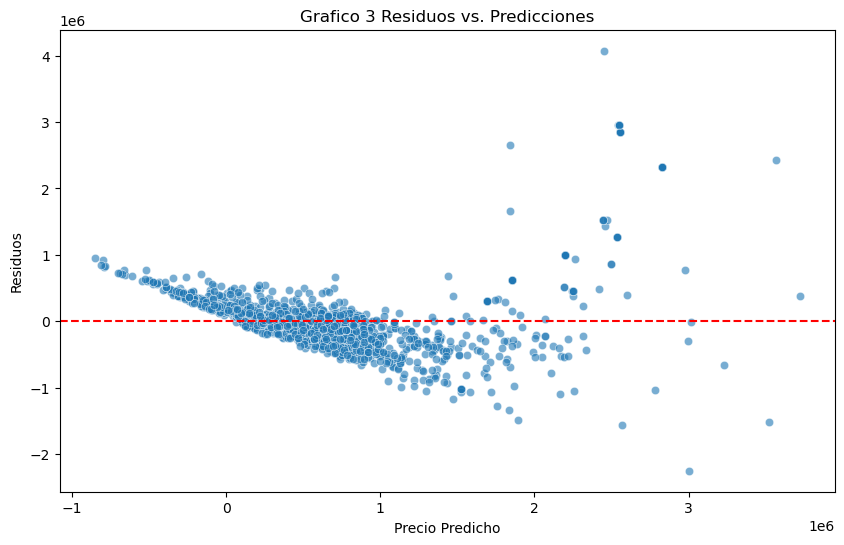

In [106]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuos, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title('Grafico 3 Residuos vs. Predicciones')
plt.xlabel('Precio Predicho')
plt.ylabel('Residuos')
plt.show()

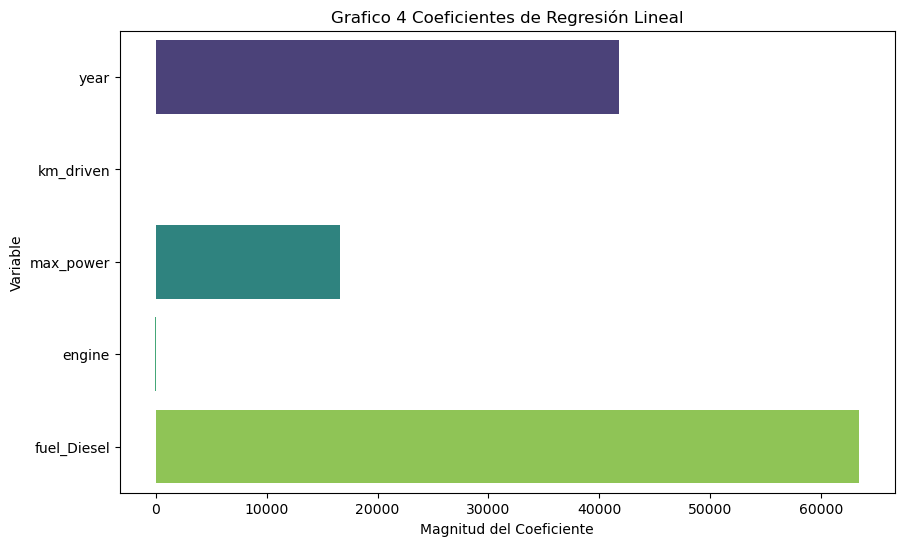

In [108]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Coeficiente', 
    y='Variable', 
    hue='Variable',  # Asignamos la variable y a hue
    data=coeficientes, 
    palette='viridis',
    legend=False  # Desactivamos la leyenda redundante
)
plt.title('Grafico 4 Coeficientes de Regresión Lineal')
plt.xlabel('Magnitud del Coeficiente')
plt.ylabel('Variable')
plt.show()

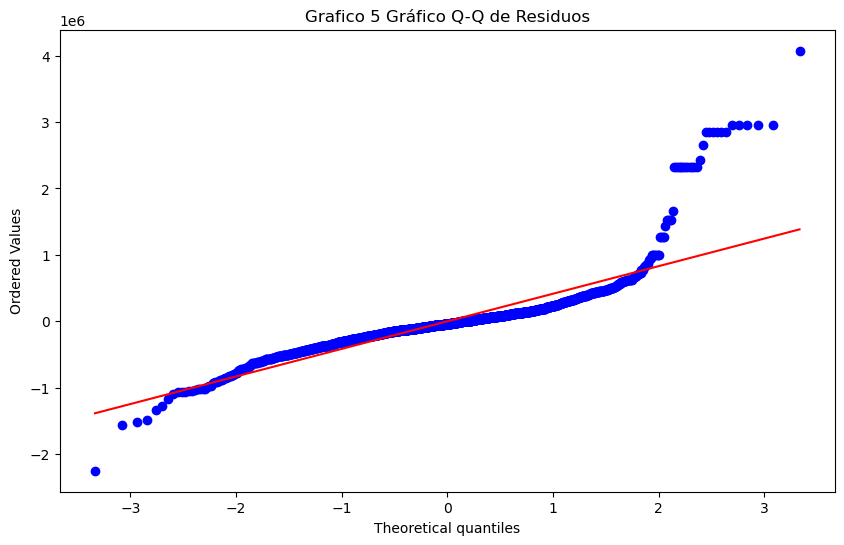

In [110]:
from scipy import stats

plt.figure(figsize=(10, 6))
stats.probplot(residuos, dist="norm", plot=plt)
plt.title('Grafico 5 Gráfico Q-Q de Residuos')
plt.show()

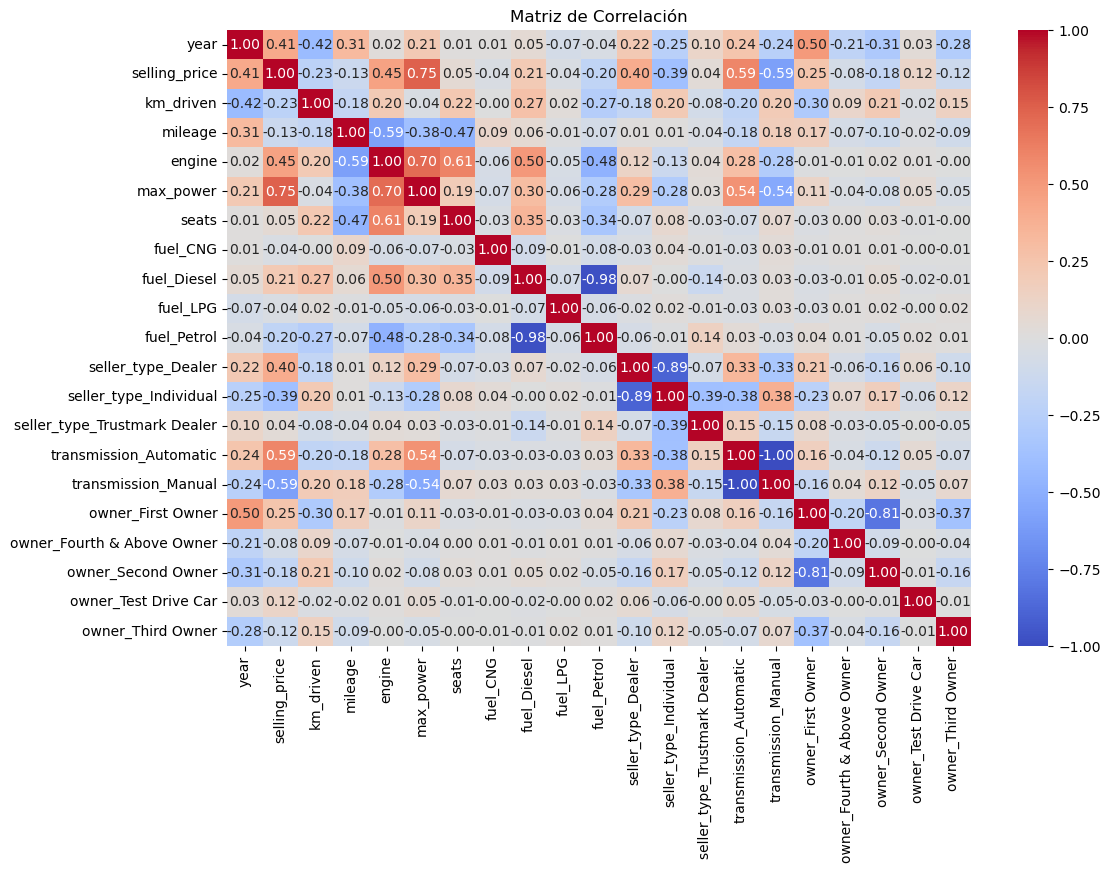

In [93]:
plt.figure(figsize=(12, 8))
correlacion = Datos_encoded.corr(numeric_only=True)
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Grafico 6 Matriz de Correlación')
plt.show()

# **8. Interpretar, analizar y documentar los resultados obtenidos. 1** 
## Regresión Lineal
## Grafico 1
*1.El primer grafico de dispersion nos indica que el modelo entrtenado tiene un rendimiento razonable, pero tiende a perder presicion a medida que los precios de los autos son mas altos, no tiene la capacidad de predecir con presisión los precios altos*
## Grafico 2
*2.Nos muestra un modelo que funciona con normalidad al ver la campana que se forma sobre el cero, los residuos en el eje y estan dispersos y no muestran ningun patron lo que indica que el modelo es bueno y tiene un funcionamientoi adecuado*
## Grafico 3
*3.Nos muestra algunas fallas en el modelo de regresion, no se ajusta bien al conjunto de datos ya que se los valores no se ven bien distribuidos al rededor del cero se forma un patron en el que a la izquierda se agrupan los valores pero a la derecha se dispersan*
## Grafico 4
*4.el grafico 4 nos muestra el como afecta cada coheficiente al precio, los ocheficioentes positivos aunmentan el precio, al valor de cada barra es el valor correspondiente de cuanto aumenta el valor dependiendo del año, tipo de combustible y demas valores de los coheficientes*
## Grafico 5
*5.Análisis de la variable objetivo: selling_price
Buscamos las variables más correlacionadas con el precio de venta.*
### 5.1.Fuertes correlaciones positivas con selling_price
1. Max_power (0.75): Altamente correlacionado. Más potencia, mayor precio. 2. Engine (0.59): También fuerte. Un motor más grande suele implicar mayor valor. 3. Year (0.41): Autos más nuevos tienden a valer más.
4. Fuel_Diesel (0.27) y fuel_LPG (0.20`): ligera correlación positiva.
5. seller_type_Dealer (0.40): Vender por dealer podría implicar autos más caros.
6. Transmission_Automatic (0.28): Autos automáticos tienden a tener un valor más alto.
## 5.2Fuertes correlaciones negativas con selling_price
1. Owner_Third Owner (-0.12): El hecho de que el auto haya tenido muchos dueños reduce su valor.
2. Owner_Second Owner (-0.18) y owner_Fourth & Above Owner (-0.08): Tendencia similar.
3. Fuel_Petrol (-0.28): Ligera correlación negativa con el precio.
4. Mileage (-0.13): A mayor consumo de combustible, menor precio (esperable).
5. Transmission_Manual (-0.28): Coherente con lo anterior: los autos manuales suelen ser más baratos.